#Titanic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. csv파일 불러오기

In [ ]:
# csv 파일 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

## 2. 데이터 정보 살펴보기

In [ ]:
# 데이터 변수 확인
print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [ ]:
print(train_df.head())
print("-" * 100)
print(test_df.head())
print("-" * 100)
print(gender_submission_df.head())
print("-" * 100)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [ ]:
# 데이터 정보 살펴보기
print(train_df.info())
print("-" * 100)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count 

In [ ]:
# 결손값 개수 
print(train_df.isnull().sum())
print('-'*100)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


train 결손값 Age, Cabin, Embarked 해당

test도 결손값 동일

In [ ]:
# 각각의 수치 확인

print(train_df.describe())
print('-'*100)
print(test_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
---------------------------------------------------------------------------------

In [ ]:
# 훈련 데이터 변수에 대한 리스트

feature = train_df.columns.values
print(feature)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## 3. 생존율 확인 및 데이터 시각화

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

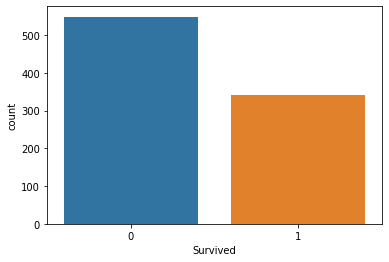

In [ ]:
sns.countplot(train_df['Survived'])
train_df['Survived'].value_counts()

####  train 데이터에서 주어진 승객들의 정보와 그들의 생존 여부를 머신러닝에게 학습하도록 하고, test 데이터에 존재하는 승객들의 생존 여부를 맞출 것

#### 아마 이런 결과물이 나올 것이다. 0이 사망자, 1이 생존자를 의미한다. 그래프를 보면 사망자의 수가 생존자의 수보다 더 많은 것을 알 수 있다. 

데이터별로 이런 타겟 변수가 한쪽의 값만 지나치게 많은 경우, 우리는 이를 'Class imbalanced problem' 이라고 부른다. 카드 사기 거래 여부, 하늘에서 운석이 떨어지는 경우를 예를 들어 보면 사기가 아닌경우, 운석이 떨어지지 않을 경우가 반대의 경우보다 그 수가 압도적으로 많다. 이때 별다른 처리 없이 머신러닝에게 데이터를 학습시킨다면, 머신러닝이 모든 데이터를 0(사망, 혹은 정상거래, 혹은 운석 안떨어짐) 이라고 예측할지도 모른다. 그리고 이 정확도를 보면, 상당히 높게 나온다. 실제로 우리가 예측하려는 데이터에도 운석이 떨어지는 날은 몇일 되지 않을 것이니까. 하지만 이 녀석은 참으로 의미없는 머신러닝 모델이 될 것이다. 실제로 우리나라 일기예보도 '365일 비 안옴' 이라고 예측하면 정확도가 75% 정도 된다고 하지만, 이것이 의미있는 예측은 아니지 않은가. 이럴때는 여러 방법들을 통해 이 불균형을 해결한 후 머신러닝 알고리즘으로 학습을 시켜야 의미있는 예측을 하는 경우가 대부분이다. 그리고 타이타닉 데이터에 있는 이 불균형정도면, 상당히 양호한 편이라고 할 수 있다. 


참조조: https://jamm-notnull.tistory.com/11

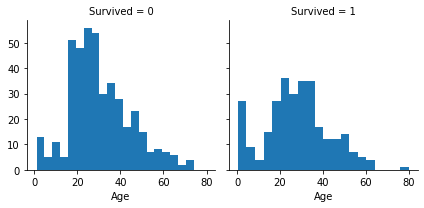

In [ ]:
# 나이에 따른 생존율

# 열(col)을 생존 여부로 나눔
 # FacetGrid -> Multy plot 하나의 데이터를 여러 개의 plot으로 나눠서 보고자 할 때 
g = sns.FacetGrid(train_df, col='Survived')

# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

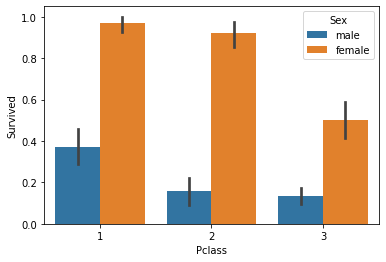

In [ ]:
# Pclass(등석) 즉, 빈부격차에 따른 생존율

sns.barplot(x='Pclass', y='Survived', hue='Sex',data=train_df)

#### 1등석에 탑승한 승객이 생존율이 가장 높고 그중 여성이 차지하는 비중이 크다. 그러나 3등석에서는 다른 Pclass에 탑승한 여성보다 비율이 많이 떨어진 것으로 보인다.

In [ ]:
# 각 특징에 따른 생존율

def bar_chart(feature):
    # 1 - 생존 O
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    # 0 - 생존 X
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    per = survived / (survived + dead)
    df = pd.DataFrame([survived, dead], index = ['survived','dead'])
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title(feature)
    plt.xticks(rotation=0)
    plt.show()
    print(df)
    print()
    print('생존 확률\n', per)

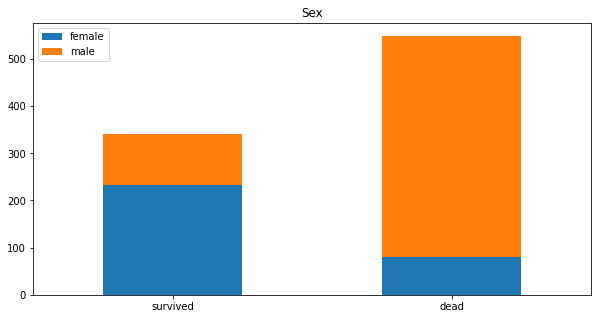

          female  male
survived     233   109
dead          81   468

생존 확률
 female    0.742038
male      0.188908
Name: Sex, dtype: float64


In [ ]:
# 성별에 따른 생존율

bar_chart("Sex")

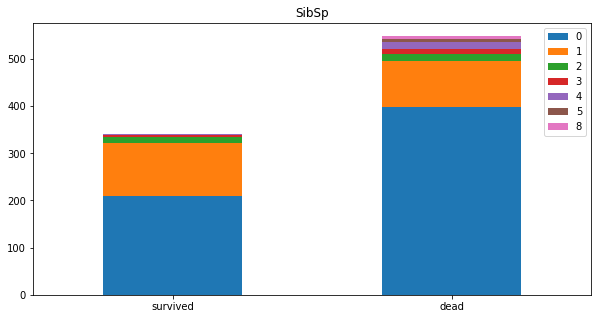

              0      1     2     3     4    5    8
survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0

생존 확률
 0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64


In [ ]:
# 동반한 Sibling(형제자매)와 Spouse(배우자)의 수에 따른 생존율 

bar_chart('SibSp')

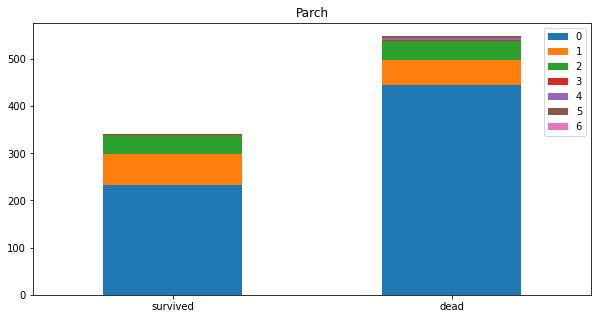

              0     1     2    3    4    5    6
survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0

생존 확률
 0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64


In [ ]:
# 동반한 Parent(부모) Child(자식)의 수에 따른 생존율

bar_chart('Parch')

#### SibSp와 Parch에서 보면 각각 1명, 3명일 때 생존확률이 높은 것으로 나타났다.


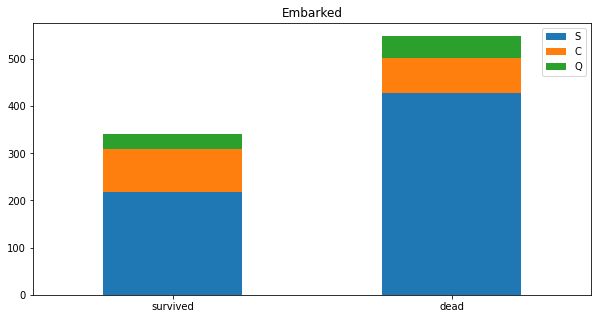

            S   C   Q
survived  217  93  30
dead      427  75  47

생존 확률
 S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64


In [ ]:
# 어디서 탑승했는지에 따른 생존율

bar_chart('Embarked')

#### 선착장 S에서 제일 많이 탑승하였고 C에서 탑승한 사람이 생존 확률이 높음 

몇몇 특성에 따른 생존율을 bar 그래프를 가지고 살펴보았다.



## 4. 데이터 전처리 및 특성 추출 

#### 각각의 특징들을 살펴보았다. 확인 결과 Ticket과 Cabin은 특별히 데이터 분석에 필요하지 않아보인다. 그래서 이 값들은 Drop out을 할 것이고 나머지 특징들 중 null값은 채워줄 것이다. 또한 Name에서 필요한 부분만 추출해서 사용할 것이다.

#### train and test data를 병합하여 데이터 전처리를 같이 시행

In [ ]:
# train, test 데이터를 한 리스트로 만듦

train_and_test = [train_df, test_df]

In [ ]:
# 이름
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.') # 정규표현식을 이용함함

train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### Name에서 Title을 추출했다. 그 후 DataFrame에 열로 추가했다.  

Name 

Mr.(미스터) 

: Mister의 약자로 남자에게 붙이는 칭호. 반드시 점(.)을 반드시 찍어야함.

Ms.(미즈)

: 결혼 여부에 관계없이 여성의 이름이나 성에 붙이는 칭호

Miss(미스) 

: 결혼하지 않은 여성에게 붙이는 칭호

Mrs.(미세스) 

: Mistress의 약자로 결혼한 여성에게 사용되는 칭호

Dr.(닥터)
: 박사




In [ ]:
# 교차표를 이용해서 추출한 Title을 가진 사람이 몇 명이 존재하는지 성별과 함께 표현
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Title을 큰 범주로 나눌 수 있다. 
Master, Miss, Mr, Mrs, other로 나눠 보자 또한 문자를 숫자로 변형할 것이다. 
모델 학습 시에 숫자로 처리해야 잘 학습된다. 

In [ ]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', "Miss")
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

# Master : 0
# Miss : 1
# Mr. : 2
# Mrs : 3
# other : 4

for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace('Master', 0)
    dataset['Title'] = dataset['Title'].replace("Miss", 1)
    dataset['Title'] = dataset['Title'].replace('Mr', 2)
    dataset['Title'] = dataset['Title'].replace('Mrs', 3)
    dataset['Title'] = dataset['Title'].replace('Other', 4)

# groupby() 메서드는 데이터를 특정 기준으로 그룹화하여 처리
# 밑에 코드는 Title을 기준으로 그룹화하여 생존율을 평균낸 것
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.575000
1,1,0.702703
2,2,0.156673
3,3,0.793651
4,4,0.347826


#### Sex 특징에서 보았듯이 여성 승객의 생존율이 남성 승객보다 훨씬 높은데, Name에서 Title을 추출하니 세부적으로 알 수 있다.


In [ ]:
# Sex 특징 처리. 이 또한 숫자로 변형한다.
# male : 1
# female : 0

for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].replace('female', 0)
    dataset['Sex'] = dataset['Sex'].replace("male", 1)

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


#### Age도 앞서 살펴본 바와 같이 나이대 별로 생존율의 차이를 보였다. pd.cut을 사용해서 범주를 5가지로 나눠보겠다. 그전에 결측치를 채워보겠다.

In [ ]:
# Age 결측치 채우기 - 평균값으로 채우겠다.
# 나이 범주 파악

for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

    

print (train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) 

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


#### Age 범주 파악 결과 
0 ~ 16 : Child - 0

16 ~ 32 : Young - 1

32 ~ 48 : Middle - 2

48 ~ 64 : Prime - 3

64 ~ 80 : Old - 4

이렇게 범주가 생성되었다.

이것을 또 간략하게 숫자로 바꾸어주겠다.

In [ ]:
#  범주를 숫자로 바꿔주기
# 0 ~ 16 : Child - 0
# 16 ~ 32 : Young - 1
# 32 ~ 48 : Middle - 2
# 48 ~ 64 : Prime - 3
# 64 ~ 80 : Old - 4

for dataset in train_and_test:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    # dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

print (train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()) 
print(train_df['Age'].head(5))

   Age  Survived
0    0  0.550000
1    1  0.344762
2    2  0.403226
3    3  0.434783
4    4  0.090909
0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int64


#### Embarked 결손값 최빈값(S)로 채움.

In [ ]:
# 
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Embarked 3가지 범주로 변환

S : 0

C : 1

Q : 2

In [ ]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#### Fare 결손값 중앙값으로 채움

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,7.8292,NaN,2,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,7.0000,NaN,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,9.6875,NaN,2,2
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,8.6625,NaN,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,12.2875,NaN,0,3


#### 요금(Fare)을 숫자 범주형 변수로 바꿔줌

In [ ]:
# 요금 4범주로 나눔
train_df['FareBand'] = pd.cut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


#### 요금 범주

0 ~ 7.91 : 0

7.91 ~ 14.454 : 1

14.454 ~ 31 : 2

31~ : 3


In [ ]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
train_and_test = [train_df, test_df]


#### 이제 필요 없는 데이터(Name, Cabin, Ticket)는 Drop out한다.

In [ ]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'AgeBand'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(train_df, test_df)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0           0       3    1    1      1      0     0         0      2
1           1       1    0    2      1      0     3         1      3
2           1       3    0    1      0      0     1         0      1
3           1       1    0    2      1      0     3         0      3
4           0       3    1    2      0      0     1         0      2
..        ...     ...  ...  ...    ...    ...   ...       ...    ...
886         0       2    1    1      0      0     1         0      4
887         1       1    0    1      0      0     2         0      1
888         0       3    0    1      1      2     2         0      1
889         1       1    1    1      0      0     2         1      2
890         0       3    1    1      0      0     0         2      2

[891 rows x 9 columns]      Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0         3    1    2      0      0     0         2      2
1         3    0    2      1  

## 모델에 넣을 데이터 준비


In [ ]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# 각 모델의 정확도 확인

In [ ]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.46

#### 상관계수를 살펴보니 Sex가 제일 영향력 있음

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Fare,0.332807
6,Embarked,0.221970
4,Parch,-0.131717
7,Title,-0.269004
3,SibSp,-0.439063
2,Age,-0.447274
0,Pclass,-0.880670
1,Sex,-2.591569


## SVC(Support Vector Machines)

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.61

## K-NN(K Nearest Neighberhood)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

## Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.87

## Decision Tree

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.23

## Random Forest

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.23

# 모델 별 정확도 비교


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent',  'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.23
5,Decision Tree,89.23
1,KNN,84.62
0,Support Vector Machines,83.61
2,Logistic Regression,79.46
4,Stochastic Gradient Decent,75.87


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

prediction = Y_pred
submission['Survived'] = prediction

submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
